## EXERCISE 1: Search of the best C

Create a SVM with linear kernel using the scikit-learn library.

Verify the performance with different values of the hyperparameter C using the function [logspace](https://numpy.org/doc/stable/reference/generated/numpy.logspace.html), nel range -20:0:20 (i.e., start=-20, stop = 0, num=20) on digits dataset.

> __QUESTION 1(a):__  Check the best configuration of C, using the 3-fold cross-validation on the digits dataset.

> __QUESTION 1(b):__ Plot the score achieved in each configuration, by showing the different values for C in the x-axis and CV score in y-axis (mean and standard deviation). Suggestion: Use the log-scale.

> __QUESTION 1(c):__ Train and test the model on the digits dataset with the best configuration found at the previous step


## Solution


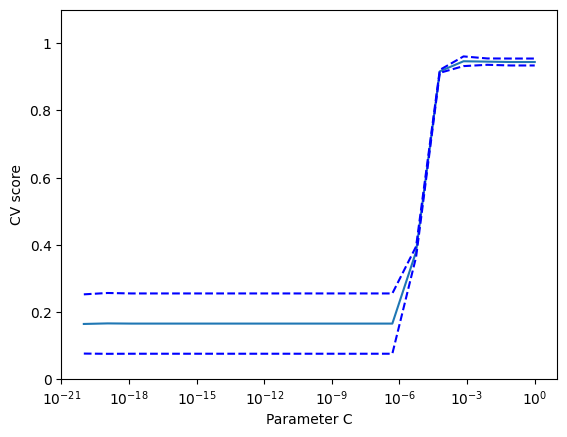

The C with the highest score is: 0.0006951927961775591
[0.16416249 0.16527546 0.16527546 0.16527546 0.16527546 0.16527546
 0.16527546 0.16527546 0.16527546 0.16527546 0.16527546 0.16527546
 0.16527546 0.16583194 0.37896494 0.91597106 0.94379521 0.94379521
 0.94490818 0.94602115]
Classification report for classifier SVC(C=0.0006951927961775591, kernel='linear'):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.96      0.96      0.96        46
           2       1.00      1.00      1.00        43
           3       0.95      0.77      0.85        47
           4       0.96      0.94      0.95        48
           5       0.92      0.98      0.95        45
           6       0.98      0.98      0.98        47
           7       0.90      0.96      0.92        45
           8       0.78      0.88      0.83        41
           9       0.89      0.87      0.88        45

    accuracy                           0

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split


X, y = datasets.load_digits(return_X_y=True)

svc = svm.SVC(kernel="linear")
C_s = np.logspace(-20, 0, 20) #define the range of C to check

scores = list()
scores_std = list()
# 3-fold cross-validation
for C in C_s:
    svc.C = C
    this_scores = cross_val_score(svc, X, y, cv=3, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

# Plot for question 1b
import matplotlib.pyplot as plt

plt.figure()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), "b--")
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), "b--")
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel("CV score")
plt.xlabel("Parameter C")
plt.ylim(0, 1.1)
plt.show()

# Best configuration
max_value = max(scores)
max_index = scores.index(max_value)
best_C = C_s[max_index]
print("The C with the highest score is:", best_C )

sorted_scores = np.sort(scores)
print(sorted_scores)

###################################
# Herein, we choose C by maximazing the accuracy, however the last four
#values allow to achieve comparable performance.
##################################

# Train and test the model

# From the lecture, we import the dataset before doing the train and the test

digits_data = datasets.load_digits() # Import the dataset

# flatten the images
n_samples = len(digits_data.images)
data = digits_data.images.reshape((n_samples, -1))

# Split data into 75% train and 25% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits_data.target, test_size=0.25, shuffle=False
)

# Create the classifier with the best C found in the previous step
svc = svm.SVC(kernel="linear", C=best_C)

# Learn the digits on the train subset
svc.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = svc.predict(X_test)

from sklearn import metrics
print(
    f"Classification report for classifier {svc}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

# Note this accuracy is different from the one obtained with the cross validation,
#since the tests are different

## EXERCISE 2: SVM on the iris_dataset

Load the iris dataset from the dataset available at this [link](https://scikit-learn.org/stable/datasets/toy_dataset.html).

> __QUESTION 2(a):__  Verify the proprieties (number of samples, number of classes, etc.) of the dataset as we did during the lecture with the digit dataset.

> __QUESTION 2(b):__ Split the dataset in training and test according to the following percentages: 70% - 30%

> __QUESTION 2(c):__ Train a SVM with different kernel (linear, rbf, polinomial) by leaving the default values for the hyperparameters

> __QUESTION 2(d):__ Test the achieved models on the test set

> __QUESTION 2(e):__ Represent the performances achieved for each kernel in the form of confusion matrix


## Solution

(150, 4)
The number of samples is:  150
[0 1 2]
The number of classes is:  3
(150,)
[5.1 3.5 1.4 0.2]
The number of samples with class 0  :  50
The number of samples with class 1  :  50
The number of samples with class 2  :  50
The number of samples in the train data is 105
The number of samples in the test data is 45
Check the distribution of the classes for training set [0 1 2]
Check the distribution of the classes for test set [0 1 2]
Accuracy kernel: linear  :  0.9333333333333333
Confusion matrix using:
[[12  0  0]
 [ 0 10  2]
 [ 0  1 20]]


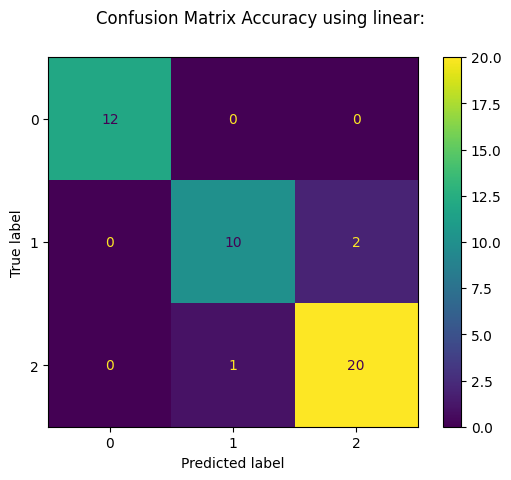

Accuracy kernel: rbf  :  0.9111111111111111
Confusion matrix using:
[[12  0  0]
 [ 0 11  1]
 [ 0  3 18]]


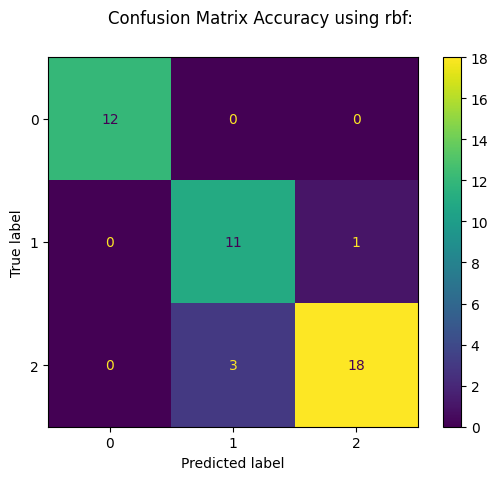

Accuracy kernel: poly  :  0.9333333333333333
Confusion matrix using:
[[12  0  0]
 [ 0 10  2]
 [ 0  1 20]]


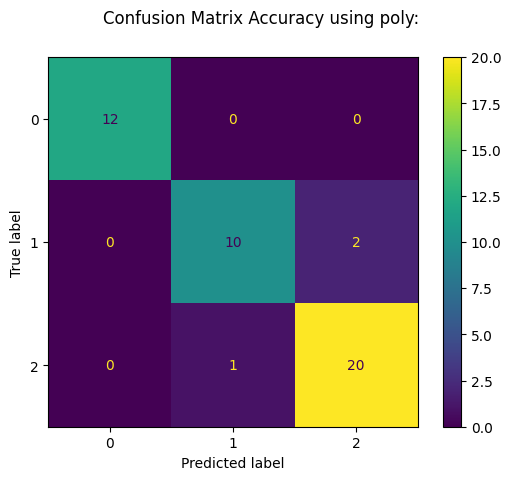

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()


# Verify the properties of the dataset

X = iris.data
y = iris.target

print(X.shape)
n_samples = X.shape[0]
print('The number of samples is: ', n_samples)

print(np.unique(y))
n_classes = len(np.unique(y))
print('The number of classes is: ', n_classes)
# Indeed, in the documetation, it is reported that the classes are:
#Iris-Setosa
#Iris-Versicolour
#Iris-Virginica
print(y.shape)

# Let's plot the first sample to see the kind of information
print(X[0])
# In the documentation, it is written that the four attributes corresponds to:
#sepal length in cm
#sepal width in cm
#petal length in cm
#petal width in cm


for c in range(n_classes):
 print('The number of samples with class', c, ' : ', len(np.where(y == c)[0]))


# Split the dataset in training and test according to the following percentages: 70% - 30%

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, shuffle=True   # You should notice by running it that without shuffling the data, the y test cannot contains sample of all the classes, so I set the shuffle parameter equal to True
)

print('The number of samples in the train data is', len(X_train))
print('The number of samples in the test data is', len(X_test))
print('Check the distribution of the classes for training set', np.unique(y_train))
print('Check the distribution of the classes for test set', np.unique(y_test))

# Train a SVM with different kernel (linear, rbf, polinomial) by leaving the default values for the hyperparameters
# fit the model
for kernel in ("linear", "rbf", "poly"):
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train)

    #Test the achieved models on the test set

    # Predict the value of the digit on the test subset
    predicted = clf.predict(X_test)

    print('Accuracy kernel:', kernel, ' : ', accuracy_score(y_test, predicted))

    # Represent the performances achieved for each kernel in the form of confusion matrix
    disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
    disp.figure_.suptitle("Confusion Matrix Accuracy using {}:".format(kernel))
    print(f"Confusion matrix using:\n{disp.confusion_matrix}")

    plt.show()

 ## Comment your results on the training and test set with the different kernels

Note that the performance you are achieving depends on the shuffle. This means that the performance (e.g., accuracy, confusion matrices, etc.) could be different in your execution.

However, as you can notice from the confusion matrices, the performances of the three kernels are comparable. Typically, in these cases, it is preferable to choose the simplest model which is the linear kernel.
